In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/jeromebiot/code/CptSAmerica/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/Users/jeromebiot/code/CptSAmerica/Data/.DS_Store
/Users/jeromebiot/code/CptSAmerica/Data/test/.DS_Store
/Users/jeromebiot/code/CptSAmerica/Data/test/Garnet Red/garnet red_9.jpg
/Users/jeromebiot/code/CptSAmerica/Data/test/Garnet Red/garnet red_3.jpg
/Users/jeromebiot/code/CptSAmerica/Data/test/Garnet Red/garnet red_6.jpg
/Users/jeromebiot/code/CptSAmerica/Data/test/Garnet Red/garnet red_4.jpg
/Users/jeromebiot/code/CptSAmerica/Data/test/Diamond/diamond_18.jpg
/Users/jeromebiot/code/CptSAmerica/Data/test/Diamond/diamond_3.jpg
/Users/jeromebiot/code/CptSAmerica/Data/test/Diamond/diamond_28.jpg
/Users/jeromebiot/code/CptSAmerica/Data/test/Diamond/diamond_9.jpg
/Users/jeromebiot/code/CptSAmerica/Data/test/Coral/coral_18.jpg
/Users/jeromebiot/code/CptSAmerica/Data/test/Coral/coral_3.jpg
/Users/jeromebiot/code/CptSAmerica/Data/test/Coral/coral_9.jpg
/Users/jeromebiot/code/CptSAmerica/Data/test/Coral/coral_28.jpg
/Users/jeromebiot/code/CptSAmerica/Data/test/Chalcedony/chalcedony_2.jpg
/Users

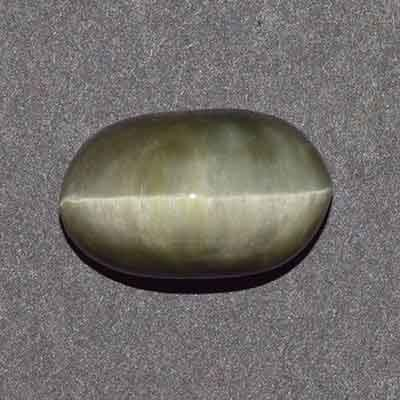

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Create train and test dir paths
train_data_dir = "/Users/jeromebiot/code/CptSAmerica/Data/train/"
test_data_dir = "/Users/jeromebiot/code/CptSAmerica/Data/test/"

img = load_img(f"{train_data_dir}Cats Eye/cats eye_11.jpg")
X = img_to_array(img)

img

In [5]:
import tensorflow as tf
from transformers import ViTFeatureExtractor, ViTForImageClassification
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
from pathlib import Path

In [ ]:
from tensorflow.keras.models import Model


In [21]:
data_augmentation = Sequential()

data_augmentation.add(layers.RandomFlip("horizontal"))
data_augmentation.add(layers.RandomZoom(0.1))
data_augmentation.add(layers.RandomTranslation(0.2, 0.2))
data_augmentation.add(layers.RandomRotation(0.1))

In [22]:
# Load model directly
from transformers import AutoImageProcessor, AutoModel

processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

base_model = AutoModel.from_pretrained("google/vit-base-patch16-224-in21k")

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [29]:

# Image size expected by ViT
img_size = (224, 224)
batch_size = 32

# Load dataset
train_ds = image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="categorical",  # For multi-class classification
    image_size=img_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    label_mode="categorical",
    image_size=img_size,
    batch_size=batch_size
)

Found 2856 files belonging to 87 classes.
Found 363 files belonging to 87 classes.


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.utils import image_dataset_from_directory

# use https://huggingface.co/docs/datasets/image_load for reference

image_dict = {}
# Define the list of file names
from pathlib import Path
from tqdm import tqdm
file_names = []
labels = []
for file in sorted((Path('/kaggle/input/gemstones-images/').glob('*/*/*.jpg'))):
    file_names.append(str(file))
    label = str(file).split('/')[-2]
    labels.append(label)
print(len(file_names), len(labels))

dataset = Dataset.from_dict({"image": file_names, "label": labels}).cast_column("image", Image())
dataset[0]["image"]

labels_list = list(set(labels))
label2id, id2label = dict(), dict()
for i, label in enumerate(labels_list):
    label2id[label] = i
    id2label[i] = label

print(id2label, '\n\n', label2id)

In [ ]:
#inputs = layers.Input(shape=(224, 224, 3))

In [52]:
def preprocess_images(images, labels):
    feature_extractor = ViTFeatureExtractor.from_pretrained(base_model)
    # Convert images to numpy array
    images = np.array([np.array(img) for img in images])
    # Normalize images
    inputs = feature_extractor(images, return_tensors="tf")
    return inputs["pixel_values"], labels

# Apply preprocessing
#train_ds = train_ds.map(preprocess_images)
#val_ds = val_ds.map(preprocess_images)

In [48]:
from transformers import ViTImageProcessor, ViTModel
from PIL import Image
import requests

##url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
#image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

In [51]:
inputs = layers.Input(shape=(224, 224, 3))


#x = data_augmentation(inputs)  # We still have our data augmentation layers
x = processor(x)  # Then a preprocessing layer specifically designed for the ViT
x = base_model(x).last_hidden_state  # Then our transfer learning model

x = layers.Flatten()(x)  # Followed by our custom dense layers, tailored to our binary task

x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
pred = layers.Dense(87, activation="softmax")(x)

# We use the keras Functional API to create our keras model
model_3 = Model(inputs=inputs, outputs=pred)

# And we freeze the ViT model
base_model.trainable = False


ValueError: Invalid image type. Expected either PIL.Image.Image, numpy.ndarray, torch.Tensor, tf.Tensor or jax.ndarray, but got <class 'keras.src.backend.common.keras_tensor.KerasTensor'>.

In [54]:
model_name = "google/vit-base-patch16-224-in21k"  # Pre-trained ViT model

# Load feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Load pre-trained model
vit_model = ViTForImageClassification.from_pretrained(
    model_name, num_labels=len(train_ds.class_names)
)

# Convert Hugging Face ViT model to TensorFlow model
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
vit_model = tf.keras.Model(inputs=input_layer, outputs=vit_model(input_layer).logits)

# Compile the model
vit_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Train the model
vit_model.fit(train_ds, validation_data=val_ds, epochs=5)

/Users/jeromebiot/.pyenv/versions/3.10.6/envs/Space_Gem/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


AttributeError: 'KerasTensor' object has no attribute 'to'